In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from mlxtend.plotting import scatterplotmatrix

In [6]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [7]:
# df=pd.read_csv('gdrive/My Drive/FinalList.csv')

df = pd.read_csv('FinalList.csv')
df

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,Molecular Formula,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,1,"1,3,5-trimethylbenzene",Hydrocarbons,Aromatic hydrocarbons,Monocyclic aromatic hydrocarbons,437.908,0.182452,NIST,Cc1cc(C)cc(C)c1,C9H12,...,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,2,1-Butene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,266.844,0.244792,NIST,CCC=C,C4H8,...,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,3,1-Pentene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,303.102,0.065615,NIST,CCCC=C,C5H10,...,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,4,"2,3-Dimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,362.941,0.395675,NIST,CCC(C)C(C)C,C7H16,...,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,5,"2,5-dimethylhexane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.231,0.067620,NIST,CC(C)CCC(C)C,C8H18,...,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,325,valeric acid,Carboxylic acids and salts,Aliphatic carboxylic acids,Alkylcarboxylic acids,459.293,0.059580,NIST,CCCCC(O)=O,C5H10O2,...,2,0,84.839551,0.893164,0.043941,-7.565020,-27.383187,30.517432,0.337332,0.536041
308,326,"1,1-dimethoxyethane",Acetals,Aliphatic acetals,Alkyl acetals,336.695,1.850290,NIST,COC(C)OC,C4H10O2,...,2,0,173.818431,1.128388,0.038517,-2.858090,-10.848476,21.707281,0.211493,0.490707
309,328,dimethyl peroxide,Organic peroxides,Other peroxides,Other peroxides,270.414,11.082100,NIST,COOC,C2H6O2,...,2,0,117.440572,1.052965,0.046742,-2.374345,-11.250341,5.997508,0.148167,0.500000
310,329,heptane-3-peroxol,Organic peroxides,Hydroperoxides,Aliphatic hydroperoxides,459.704,1.508060,NIST,CCCCC(CC)OO,C7H16O2,...,2,0,171.625428,1.106192,0.031590,-4.779775,-13.715054,53.241940,0.329739,0.325457


In [8]:
df.drop(['ID','Fuel','Molecular Formula','SMILES','Class','Sub-Class','Group','Uncertainty','Source'],axis = 1,inplace = True)
df.head()

,BP2,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,437.908,21,120.195,0.985228,0.318633,0.224307,1.111111,84,42,-0.227243,...,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,266.844,12,56.108,0.918296,0.363684,0.256152,1.500000,10,10,-0.249853,...,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,303.102,15,70.135,0.918296,0.372016,0.235045,1.500000,20,14,-0.249613,...,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,362.941,23,100.205,0.886541,0.454902,0.195983,1.642857,46,26,-0.296727,...,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,382.231,26,114.232,0.890492,0.374392,0.189449,1.625000,74,30,-0.299486,...,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495


# Visualize the data 

In [9]:
# res = ['Z1',
#  'Wiener',
#  'GGI4',
#  'WNSA3',
#  'GATS1v',
#  'Mor10v',
#  'RNCG',
#  'LUMO',
#  'BalabanJ',
#  'JGI1',
#  'HBondD',
#  'RPCG']



# sns.pairplot(df,x_vars=res,y_vars = 'BP')

<bound method Artist.set of <AxesSubplot:xlabel='Normal Boiling Point (K)', ylabel='Count'>>

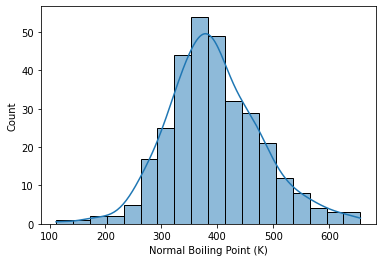

In [10]:
ax = sns.histplot(data=df, x='BP2', kde=True)
ax.set(xlabel='Normal Boiling Point (K)')
ax.set

# Correlation matrix containing the Pearson product-moment correlation coefficients

In [11]:
# from mlxtend.plotting import heatmap
# from matplotlib.pyplot import figure

# names = ['BP','N_Atoms','MW','IC0','PJ3','SIC0','GATS1v','Wiener','Z1','HOMO','LUMO','DM','EI','CP','H','BalabanJ','CIC3','GGI4','JGI1','Mor10v','Mor16se']
# cm = np.corrcoef(df[names].values.T) #P - measures the linear dependence between pairs of features
# hm = heatmap(cm,
#              figsize =(12,12),
#              row_names = names,
#              column_names = names)

# plt.show()

# Drop unnecessary variables

In [12]:
cor = df.corr().abs()

#Correlation with output variable
cor_target = cor["BP2"].copy()

#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.5]
print('Correlations with boiling point','\n')
print(cor_target,'\n')
print('----------------------------------------------'+'\n')
print('Relevant features', '\n')
print(relevant_features)

Correlations with boiling point 

BP2          1.000000
N_Atoms      0.707917
MW           0.856925
IC0          0.158937
PJ3          0.178951
SIC0         0.303506
GATS1v       0.457286
Wiener       0.626861
Z1           0.858177
HOMO         0.119597
LUMO         0.275934
DM           0.155857
EI           0.258641
CP           0.199195
H            0.243483
BalabanJ     0.277429
CIC3         0.105497
GGI4         0.604534
JGI1         0.158495
Mor10v       0.377083
Mor16se      0.522493
GRAVH        0.854859
HBondA       0.256508
HBondD       0.218024
HeteroA      0.286056
AromaticR    0.471941
CPS          0.365977
GATS2m       0.050578
FPSA3        0.106038
WNSA3        0.591435
PNSA3        0.345035
ATS3p        0.726330
RPCG         0.137999
RNCG         0.352641
Name: BP2, dtype: float64 

----------------------------------------------

Relevant features 

BP2        1.000000
N_Atoms    0.707917
MW         0.856925
Wiener     0.626861
Z1         0.858177
GGI4       0.604534
Mo

In [13]:
cor_target.sort_values(axis=0,ascending=False,inplace=True)#this is a series
cor_target #arrange in descending order based on correlation with BP

BP2          1.000000
Z1           0.858177
MW           0.856925
GRAVH        0.854859
ATS3p        0.726330
N_Atoms      0.707917
Wiener       0.626861
GGI4         0.604534
WNSA3        0.591435
Mor16se      0.522493
AromaticR    0.471941
GATS1v       0.457286
Mor10v       0.377083
CPS          0.365977
RNCG         0.352641
PNSA3        0.345035
SIC0         0.303506
HeteroA      0.286056
BalabanJ     0.277429
LUMO         0.275934
EI           0.258641
HBondA       0.256508
H            0.243483
HBondD       0.218024
CP           0.199195
PJ3          0.178951
IC0          0.158937
JGI1         0.158495
DM           0.155857
RPCG         0.137999
HOMO         0.119597
FPSA3        0.106038
CIC3         0.105497
GATS2m       0.050578
Name: BP2, dtype: float64

In [14]:
relevant_features.sort_values(axis=0, ascending=False, inplace=True) #this is a series
relevant_features #features with correlation coefficient with BP greater than .5

BP2        1.000000
Z1         0.858177
MW         0.856925
GRAVH      0.854859
ATS3p      0.726330
N_Atoms    0.707917
Wiener     0.626861
GGI4       0.604534
WNSA3      0.591435
Mor16se    0.522493
Name: BP2, dtype: float64

In [15]:
new_list=cor_target.keys().tolist()
new_list

['BP2',
 'Z1',
 'MW',
 'GRAVH',
 'ATS3p',
 'N_Atoms',
 'Wiener',
 'GGI4',
 'WNSA3',
 'Mor16se',
 'AromaticR',
 'GATS1v',
 'Mor10v',
 'CPS',
 'RNCG',
 'PNSA3',
 'SIC0',
 'HeteroA',
 'BalabanJ',
 'LUMO',
 'EI',
 'HBondA',
 'H',
 'HBondD',
 'CP',
 'PJ3',
 'IC0',
 'JGI1',
 'DM',
 'RPCG',
 'HOMO',
 'FPSA3',
 'CIC3',
 'GATS2m']

In [16]:
df2=df.reindex(columns=new_list)

df2

,BP2,Z1,MW,GRAVH,ATS3p,N_Atoms,Wiener,GGI4,WNSA3,Mor16se,...,CP,PJ3,IC0,JGI1,DM,RPCG,HOMO,FPSA3,CIC3,GATS2m
0,437.908,42,120.195,1308.111489,58.506429,21,84,0.333333,-1.532920,0.507004,...,-0.108725,0.318633,0.985228,0.333333,0.037601,0.142741,-0.227243,0.023771,2.264232,0.810185
1,266.844,10,56.108,393.448663,16.143384,12,10,0.000000,-1.232569,0.014358,...,-0.111982,0.363684,0.918296,0.166667,0.336790,0.192906,-0.249853,0.026443,0.729574,1.260417
2,303.102,14,70.135,545.352707,25.164912,15,20,0.000000,-1.308787,0.047339,...,-0.112219,0.372016,0.918296,0.125000,0.328765,0.163565,-0.249613,0.026643,0.716993,1.312500
3,362.941,26,100.205,921.041855,58.142762,23,46,0.000000,-1.059327,0.221296,...,-0.105131,0.454902,0.886541,0.333333,0.056010,0.077032,-0.296727,0.019681,1.621053,1.183248
4,382.231,30,114.232,1079.890676,65.151442,26,74,0.320000,-1.227298,0.468037,...,-0.109032,0.374392,0.890492,0.357143,0.078138,0.066477,-0.299486,0.019948,2.500752,1.222512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,459.293,24,102.133,999.623406,30.517432,17,52,0.160000,-7.565020,0.224462,...,-0.131938,0.361608,1.332820,0.250000,1.302018,0.337332,-0.274111,0.043941,0.632640,0.893164
308,336.695,20,90.122,874.990541,21.707281,16,31,0.000000,-2.858090,-0.098079,...,-0.084131,0.424452,1.298795,0.300000,1.843983,0.211493,-0.254585,0.038517,1.516541,1.128388
309,270.414,10,62.068,501.616011,5.997508,10,10,0.000000,-2.374345,-0.114960,...,-0.105545,0.357160,1.370951,0.166667,1.394303,0.148167,-0.243760,0.046742,1.950978,1.052965
310,459.704,32,132.203,1346.901007,53.241940,25,104,0.160000,-4.779775,0.628098,...,-0.112424,0.499351,1.217797,0.187500,1.664803,0.329739,-0.253153,0.031590,0.940391,1.106192


In [17]:
colli = cor[abs(cor)>0.85] #pairwise correlations that exceed a collinearity threshold of 0.85

def matrix_to_xy(df, columns=None, reset_index=False):
    bool_index = np.triu(np.ones(df.shape)).astype(bool)
    xy = (
        df.where(bool_index).stack().reset_index()
        if reset_index
        else df.where(bool_index).stack()
    )
    if reset_index:
        xy.columns = columns or ["row", "col", "val"]
    return xy

xy = matrix_to_xy(colli, reset_index=True)

highCorr = pd.DataFrame(xy)
# remove rows by filtering
highCorrVals = highCorr[highCorr['val'] != 1]
# display the dataframe
highCorrVals

,row,col,val
1,BP2,MW,0.856925
2,BP2,Z1,0.858177
3,BP2,GRAVH,0.854859
5,N_Atoms,MW,0.928822
6,N_Atoms,GRAVH,0.869474
7,N_Atoms,ATS3p,0.959588
9,MW,Z1,0.947841
10,MW,GRAVH,0.986470
11,MW,ATS3p,0.905093
13,IC0,HeteroA,0.867215


In [18]:

#MAIN CODE

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
df2.drop(df2[to_drop], axis=1,inplace=True)
df2


,BP2,Wiener,GGI4,WNSA3,Mor16se,AromaticR,GATS1v,Mor10v,CPS,RNCG,...,LUMO,HBondD,PJ3,JGI1,DM,RPCG,HOMO,FPSA3,CIC3,GATS2m
0,437.908,84,0.333333,-1.532920,0.507004,6,1.111111,0.036857,119.007881,0.128051,...,0.009793,0,0.318633,0.333333,0.037601,0.142741,-0.227243,0.023771,2.264232,0.810185
1,266.844,10,0.000000,-1.232569,0.014358,0,1.500000,0.007181,97.357465,0.349211,...,0.025890,0,0.363684,0.166667,0.336790,0.192906,-0.249853,0.026443,0.729574,1.260417
2,303.102,20,0.000000,-1.308787,0.047339,0,1.500000,0.051929,128.152792,0.296013,...,0.025174,0,0.372016,0.125000,0.328765,0.163565,-0.249613,0.026643,0.716993,1.312500
3,362.941,46,0.000000,-1.059327,0.221296,0,1.642857,0.107795,185.939758,0.165887,...,0.086465,0,0.454902,0.333333,0.056010,0.077032,-0.296727,0.019681,1.621053,1.183248
4,382.231,74,0.320000,-1.227298,0.468037,0,1.625000,0.049435,207.363945,0.140495,...,0.081422,0,0.374392,0.357143,0.078138,0.066477,-0.299486,0.019948,2.500752,1.222512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,459.293,52,0.160000,-7.565020,0.224462,0,1.395437,0.088400,84.839551,0.536041,...,0.010236,1,0.361608,0.250000,1.302018,0.337332,-0.274111,0.043941,0.632640,0.893164
308,336.695,31,0.000000,-2.858090,-0.098079,0,1.745497,0.033843,173.818431,0.490707,...,0.086322,0,0.424452,0.300000,1.843983,0.211493,-0.254585,0.038517,1.516541,1.128388
309,270.414,10,0.000000,-2.374345,-0.114960,0,1.848186,-0.056937,117.440572,0.500000,...,0.032669,0,0.357160,0.166667,1.394303,0.148167,-0.243760,0.046742,1.950978,1.052965
310,459.704,104,0.160000,-4.779775,0.628098,0,1.540004,0.312873,171.625428,0.325457,...,0.028305,1,0.499351,0.187500,1.664803,0.329739,-0.253153,0.031590,0.940391,1.106192


In [19]:
to_drop

['Z1',
 'MW',
 'GRAVH',
 'ATS3p',
 'N_Atoms',
 'PNSA3',
 'EI',
 'HBondA',
 'H',
 'CP',
 'IC0']

# Use 80% of data for training, 20% for testing

In [20]:
from sklearn.model_selection import train_test_split

x = df2.drop(['BP2'],axis = 1).to_numpy()
y = df2['BP2'].values
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [21]:
features = df2.drop(['BP2'],axis = 1)
features

,Wiener,GGI4,WNSA3,Mor16se,AromaticR,GATS1v,Mor10v,CPS,RNCG,SIC0,...,LUMO,HBondD,PJ3,JGI1,DM,RPCG,HOMO,FPSA3,CIC3,GATS2m
0,84,0.333333,-1.532920,0.507004,6,1.111111,0.036857,119.007881,0.128051,0.224307,...,0.009793,0,0.318633,0.333333,0.037601,0.142741,-0.227243,0.023771,2.264232,0.810185
1,10,0.000000,-1.232569,0.014358,0,1.500000,0.007181,97.357465,0.349211,0.256152,...,0.025890,0,0.363684,0.166667,0.336790,0.192906,-0.249853,0.026443,0.729574,1.260417
2,20,0.000000,-1.308787,0.047339,0,1.500000,0.051929,128.152792,0.296013,0.235045,...,0.025174,0,0.372016,0.125000,0.328765,0.163565,-0.249613,0.026643,0.716993,1.312500
3,46,0.000000,-1.059327,0.221296,0,1.642857,0.107795,185.939758,0.165887,0.195983,...,0.086465,0,0.454902,0.333333,0.056010,0.077032,-0.296727,0.019681,1.621053,1.183248
4,74,0.320000,-1.227298,0.468037,0,1.625000,0.049435,207.363945,0.140495,0.189449,...,0.081422,0,0.374392,0.357143,0.078138,0.066477,-0.299486,0.019948,2.500752,1.222512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,52,0.160000,-7.565020,0.224462,0,1.395437,0.088400,84.839551,0.536041,0.326075,...,0.010236,1,0.361608,0.250000,1.302018,0.337332,-0.274111,0.043941,0.632640,0.893164
308,31,0.000000,-2.858090,-0.098079,0,1.745497,0.033843,173.818431,0.490707,0.324699,...,0.086322,0,0.424452,0.300000,1.843983,0.211493,-0.254585,0.038517,1.516541,1.128388
309,10,0.000000,-2.374345,-0.114960,0,1.848186,-0.056937,117.440572,0.500000,0.412697,...,0.032669,0,0.357160,0.166667,1.394303,0.148167,-0.243760,0.046742,1.950978,1.052965
310,104,0.160000,-4.779775,0.628098,0,1.540004,0.312873,171.625428,0.325457,0.262238,...,0.028305,1,0.499351,0.187500,1.664803,0.329739,-0.253153,0.031590,0.940391,1.106192


# Use Random Forest to select important features

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,KFold


param_grid2 = {
    "n_estimators" : [50,75,100,120,130,350],
    "max_features" : ["auto", "sqrt", "log2"],
    "min_samples_split": [2,3,4,5,8],
    "bootstrap": [True, False]}
    

grid2 = GridSearchCV(RandomForestRegressor(random_state=0),param_grid2,n_jobs=-1,
                     cv =KFold(n_splits=10, shuffle=True, random_state=9),verbose=2,scoring='r2')
grid2.fit(x_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 8],
                         'n_estimators': [50, 75, 100, 120, 130, 350]},
             scoring='r2', verbose=2)

In [27]:
print(grid2.best_params_)
print('Mean test score: %.3f' % (grid2.best_score_) )

{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 130}
Mean test score: 0.927


Text(0.5, 0, 'Random Forest Feature Importance')

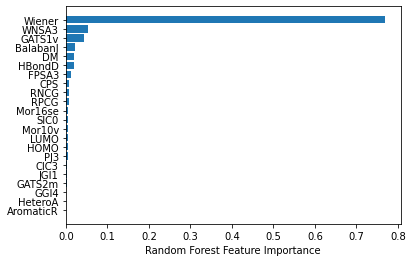

In [30]:
model =  RandomForestRegressor(n_estimators=130,min_samples_split=3,max_features='auto',bootstrap = 'True',random_state=0)
model.fit(x_train, y_train)

labs = features.columns
sorted_idx = model.feature_importances_.argsort()
plt.barh(labs[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance") 

Text(0.5, 0, 'Permutation Importance')

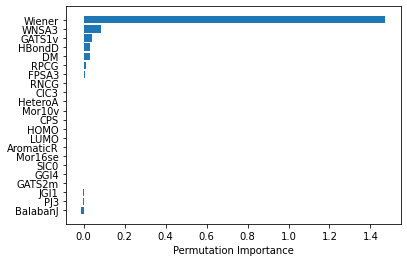

In [31]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model,x_test,y_test, n_repeats = 10,random_state=12)

sorted_idx2 = perm_importance.importances_mean.argsort()
plt.barh(labs[sorted_idx2], perm_importance.importances_mean[sorted_idx2])
plt.xlabel("Permutation Importance")